# Lab 1: Simple Linear Regression

From the dataset, select two variables: one dependent (or response) variable (Y ) and one
independent variable (or regressor) (X).
How to choose? The response variable (Y ) should be the main focus of your study—the
variable you want to predict. The regressor (X) is the helper variable you will use to make
those predictions.
Once you have your two numerical variables, complete the following tasks:

In [1]:
duom <- read.csv("lab1_duomenys.csv", header=TRUE)
attach(duom)
Y <- duom$Overall.score
X <- duom$Political.participation


## 1. Formulate a simple linear regression model to analyze the relationship between your response variable Y and your regressor X. Estimate the model’s parameters using the least squares method.

### MANUAL

[1] "beta0 = -0.283483"

[1] "beta1 = 1.023481"

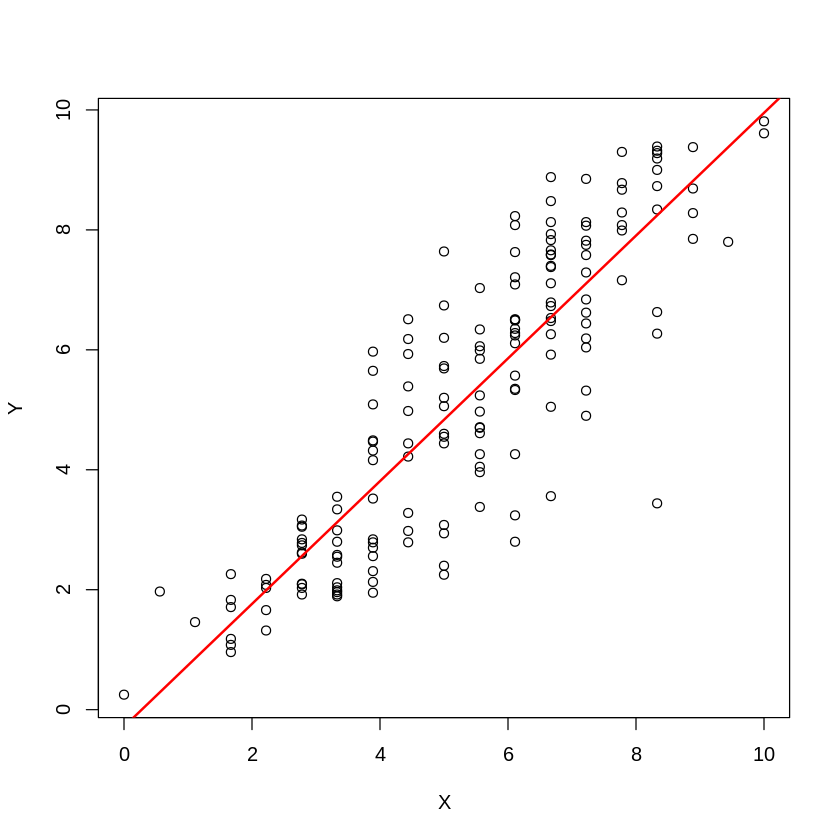

In [2]:
XY <- X*Y
n <- nrow(duom)
beta1 <- (n*sum(XY) - sum(X)*sum(Y)) / (n*sum(X^2) - (sum(X))^2)
beta0 <- (sum(Y) - beta1 * sum(X)) / n
sprintf("beta0 = %f", beta0)
sprintf("beta1 = %f", beta1)
Y_hat <- beta0 + beta1*X
plot(X, Y)
abline(beta0, beta1, col="red", lwd=2)

### USING R FUNCTIONS

[1] "models beta0 = -0.283483"

[1] "models beta1 = 1.023481"


Call:
lm(formula = Y ~ X, data = duom)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8021 -0.6717  0.1782  0.7821  2.8061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.28348    0.25969  -1.092    0.277    
X            1.02348    0.04543  22.528   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.208 on 165 degrees of freedom
Multiple R-squared:  0.7547,	Adjusted R-squared:  0.7532 
F-statistic: 507.5 on 1 and 165 DF,  p-value: < 2.2e-16


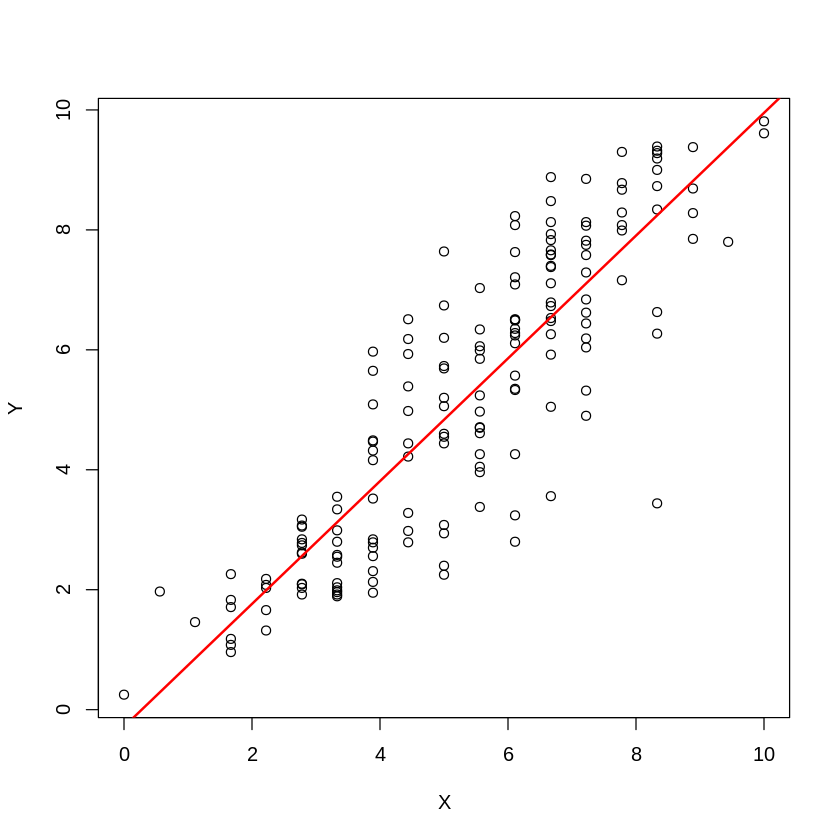

In [3]:
model <- lm(Y ~ X, data = duom)
s <- summary(model)
model_beta0 <- model$coefficients[1]
model_beta1 <- model$coefficients[2]
sprintf("models beta0 = %f", model_beta0)
sprintf("models beta1 = %f", model_beta1)
s
plot(X, Y)
abline(model, col="red", lwd=2)

## 3. Estimate the error variance and the coefficient of determination (R^2). Explain what these two metrics reveal about the quality and fit of your regression model.

### MANUAL

In [4]:
residuals <- Y - Y_hat
SSE <- sum(residuals^2)
SST <- sum((Y - mean(Y))^2)
MSE <- SSE / (n - 2)
R_sqr <- 1 - SSE / SST
sigma <- sqrt(MSE)
sprintf("error variance = %f", sigma)
sprintf("coefficient of determination = %f", R_sqr)

[1] "error variance = 1.208261"

[1] "coefficient of determination = 0.754655"

### USING R FUNCTIONS

In [5]:
model_sigma <- s$sigma
model_R_sqr <- s$r.squared
sprintf("models error variance = %f", model_sigma)
sprintf("models coefficient of determination = %f", model_R_sqr)

[1] "models error variance = 1.208261"

[1] "models coefficient of determination = 0.754655"

## 4. Test the hypotheses for the significance of the model’s parameters. If a parameter is found to be insignificant, remove it from the model, and re-estimate the new model’s parameters.

### MANUAL

In [6]:
# H_0: beta0 = 0
# H_1: beta0 != 0

# H_0: beta1 = 0
# H_1: beta1 != 0

S_xx <- sum((X - mean(X))^2)
alpha <- 0.05
SE_beta1 <- sqrt(MSE / S_xx)
t_beta1 <- beta1 / SE_beta1
p_beta1 <- 2 * pt(-abs(t_beta1), n - 2)
SE_beta0 <- sqrt(MSE*(1/n + ((mean(X))^2)/S_xx))
t_beta0 <- beta0 / SE_beta0
p_beta0 <- 2 * pt(-abs(t_beta0), n - 2)
sprintf("beta0 p-value is less than alpha = %s", p_beta0 < alpha)
sprintf("beta1 p-value is less than alpha = %s", p_beta1 < alpha)

[1] "beta0 p-value is less than alpha = FALSE"

[1] "beta1 p-value is less than alpha = TRUE"

beta1 null hypothesis is rejected, the parameter is significant, and beta0 is not rejected, the parameter is insignificant. Reestimating the model after removing beta0 parameter.

In [7]:
beta1_no_intercept <- sum(X*Y) / sum(X^2)
Y_hat_no_intercept <- beta1_no_intercept * X
SSE_no_intercept <- sum((Y - Y_hat_no_intercept)^2)
R_sqr_no_intercept <- sum(Y_hat_no_intercept^2) / sum(Y^2)
MSE_no_intercept <- SSE_no_intercept / (n-2)
sprintf("Coefficient of determination with no intercept = %f", R_sqr_no_intercept)
sprintf("Error variance with no intercept = %f", MSE_no_intercept)

[1] "Coefficient of determination with no intercept = 0.955510"

[1] "Error variance with no intercept = 1.470438"

The model significantly improved. The second model is better fitted to the data because R^2 is much higher. Error variance is quite similar to the first model.

### USING R FUNCTIONS

In [8]:
s


Call:
lm(formula = Y ~ X, data = duom)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8021 -0.6717  0.1782  0.7821  2.8061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.28348    0.25969  -1.092    0.277    
X            1.02348    0.04543  22.528   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.208 on 165 degrees of freedom
Multiple R-squared:  0.7547,	Adjusted R-squared:  0.7532 
F-statistic: 507.5 on 1 and 165 DF,  p-value: < 2.2e-16


In [9]:
model_pvalue_beta0 = s$coefficients[1, 4]
model_pvalue_beta1 = s$coefficients[2, 4]

sprintf("model beta0 p-value is less than alpha = %s", model_pvalue_beta0 < alpha)
sprintf("model beta1 p-value is less than alpha = %s", model_pvalue_beta1 < alpha)

[1] "model beta0 p-value is less than alpha = FALSE"

[1] "model beta1 p-value is less than alpha = TRUE"

In [10]:
model_no_intercept <- lm(Y ~ 0 + X, data = duom)
s_no_intercept <- summary(model_no_intercept)
model_R_sqr_no_intercept <- s_no_intercept$r.squared
model_sigma_no_intercept <- s_no_intercept$sigma
sprintf("Coefficient of determination with no intercept = %f", model_R_sqr_no_intercept)
sprintf("Error variance with no intercept = %f", model_sigma_no_intercept)

[1] "Coefficient of determination with no intercept = 0.955510"

[1] "Error variance with no intercept = 1.208958"

## 5. Create a scatter plot of your data points (X, Y ). On the same plot, add the fitted regression line. Also, include the 90% confidence intervals (γ = 0.9) for both the mean of the prediction and the individual prediction.


### MANUAL

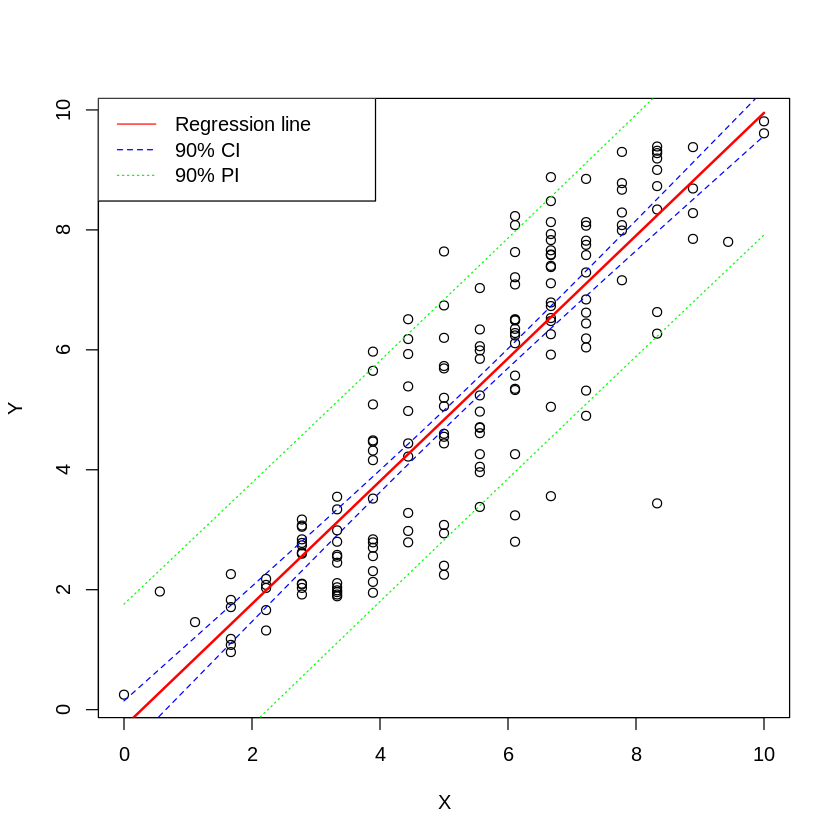

In [39]:
alpha <- 0.10
t_val <- qt(1 - alpha/2, n - 2)
X_grid <- seq(min(X), max(X), length.out = 100)
Y_hat_grid <- beta0 + beta1 * X_grid

SE_mean_grid <- sigma * sqrt(1/n + (X_grid - mean(X))^2 / S_xx)
SE_pred_grid <- sigma * sqrt(1 + 1/n + (X_grid - mean(X))^2 / S_xx)


CI_upper_grid <- Y_hat_grid + t_val * SE_mean_grid
CI_lower_grid <- Y_hat_grid - t_val * SE_mean_grid

PI_upper_grid <- Y_hat_grid + t_val * SE_pred_grid
PI_lower_grid <- Y_hat_grid - t_val * SE_pred_grid

plot(X, Y)
lines(X_grid, Y_hat_grid, col = "red", lwd=2)
lines(X_grid, CI_upper_grid, col = "blue", lty=2)
lines(X_grid, CI_lower_grid, col = "blue", lty=2)
lines(X_grid, PI_upper_grid, col = "green", lty=3)
lines(X_grid, PI_lower_grid, col = "green", lty=3)

legend("topleft", legend=c("Regression line", "90% CI", "90% PI"), col=c("red", "blue", "green"), lty=c(1,2,3))

### USING R FUNCTIONS

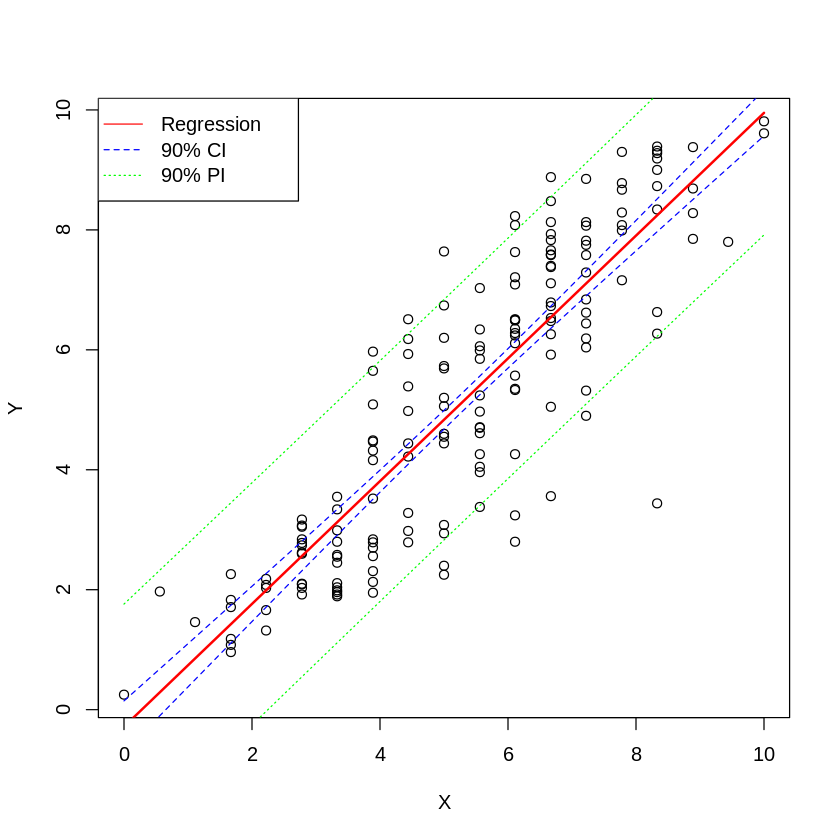

In [28]:
X_grid_2 <- data.frame(X = seq(min(X), max(X), length.out = 167))
pred_CI <- predict(model, newdata = X_grid_2, interval = "confidence", level = 0.90)
pred_PI <- predict(model, newdata = X_grid_2, interval = "prediction", level = 0.90)
plot(X,Y)
lines(X_grid_2$X, pred_CI[,"fit"], col = "red", lwd = 2)
lines(X_grid_2$X, pred_CI[,"lwr"], col = "blue", lty = 2)
lines(X_grid_2$X, pred_CI[,"upr"], col = "blue", lty = 2)
lines(X_grid_2$X, pred_PI[,"lwr"], col = "green", lty = 3)
lines(X_grid_2$X, pred_PI[,"upr"], col = "green", lty = 3)

legend("topleft", legend = c("Regression", "90% CI", "90% PI"), col = c("red", "blue", "green"), pch = c(NA, NA, NA), lty = c(1,2,3))